Q1 in Part II

In [3]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Set a random seed for replication purposes
np.random.seed(1000)
# Set up parameter domain for normal distributions with mean 0 and scale 1 
# Note that 95 percent confidence interval lies between -1.96 and 1.96 for normal distributions with mean 0 and scale 1
# Thus, establishing interval between -10 and 10 can contain all the points from the normal distributions
parameter_domain = np.linspace(-10,10,1001)
x1 = stats.norm(loc=0,scale=1).rvs(1)[0]
x2 = stats.norm(loc=0,scale=1).rvs(1)[0]
x3 = stats.norm(loc=0,scale=1).rvs(1)[0]
print(x1,x2,x3)

-0.8044583035248052 0.3209315470898572 -0.025482880472072204


In [4]:
likelihood_1 = stats.norm.pdf(x1,loc=parameter_domain,scale=1)
likelihood_2 = stats.norm.pdf(x2,loc=parameter_domain,scale=1)
likelihood_3 = stats.norm.pdf(x3,loc=parameter_domain,scale=1)

Text(0.5, 1.0, 'Individual Likelihoods of Each Observation')

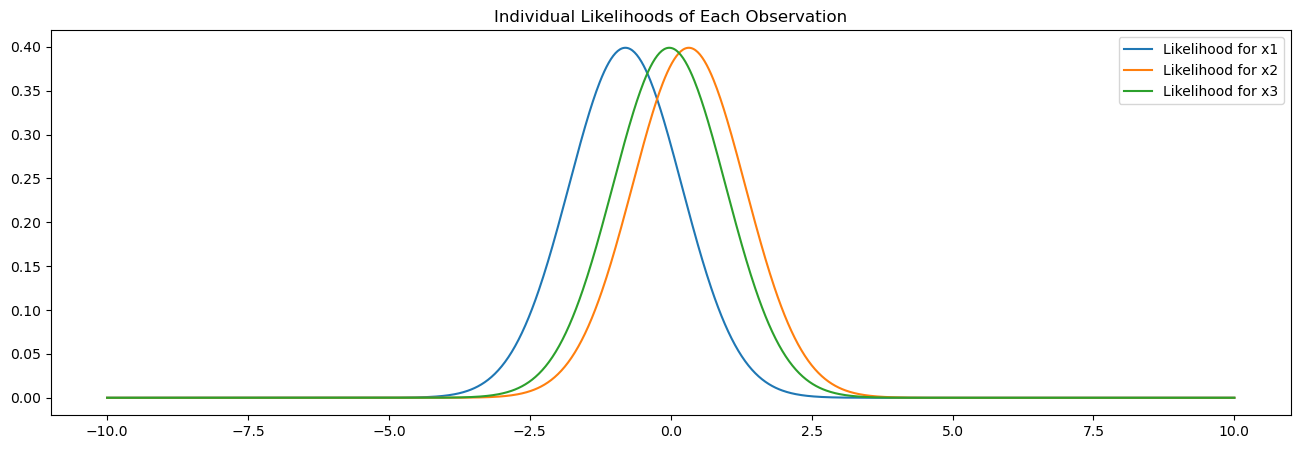

In [5]:
plt.figure(figsize=(16,5))
plt.plot(parameter_domain,likelihood_1,label="Likelihood for x1")
plt.plot(parameter_domain,likelihood_2,label="Likelihood for x2")
plt.plot(parameter_domain,likelihood_3,label="Likelihood for x3")
plt.legend()
plt.title("Individual Likelihoods of Each Observation")

Q2 in Part II

Text(0.5, 1.0, 'Visualize log priors, likelihoods, and joint distribution')

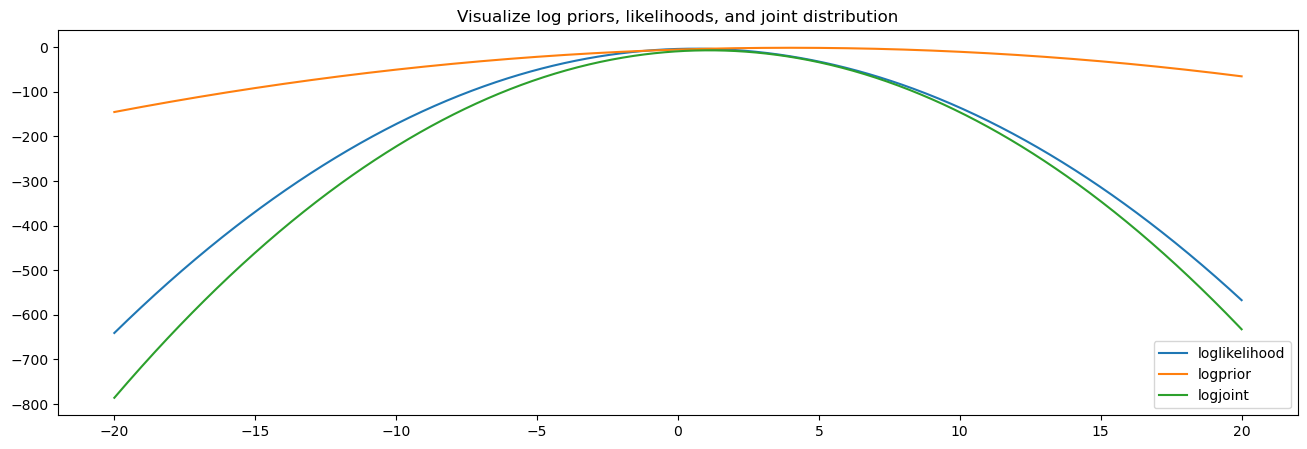

In [16]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-20,20,1001); 
log_likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) # Use sum instead of multiplication in log cases
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) 
log_joint = log_likelihood+log_prior # elementwise summation 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, log_likelihood, label="loglikelihood") 
plt.plot(parameter_domain, log_prior, label="logprior")
plt.plot(parameter_domain, log_joint, label="logjoint")
plt.legend()
plt.title("Visualize log priors, likelihoods, and joint distribution")

Q3 in Part II

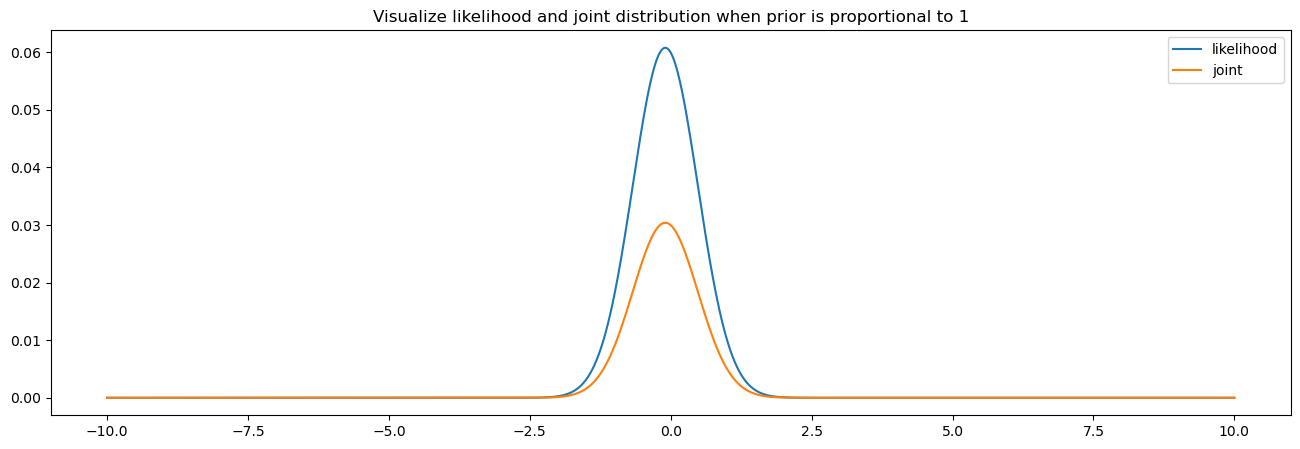

In [21]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = 0.5
joint = likelihood*prior # elementwise multiplication 
plt.figure(figsize=(16,5)) 
plt.plot(parameter_domain, likelihood, label="likelihood") 
plt.plot(parameter_domain, joint, label="joint")
plt.legend()
plt.title("Visualize likelihood and joint distribution when prior is proportional to 1");

When probability of theta is proportional to 1, prior can be considered as a flat prior. Since posterior is proportional
to likelihood times prior and likelihood follows normal distribution, then posterior also follows normal distribution 
with the same mean and variance with the likelihood function. Note from the plot above, joint likelihood function is
proportional to the likelihood function with mean at zero and spread be the same. 

Q4 in Part II

Since posterior is proportional to likelihood times prior divided by the marginalized likelihood constant, then 
log posterior is proportional to log likelihood plus prior minus the log marginalized likelihood constant. 
When an improper prior is introduced, the log prior may not guarantee a proper probability density function 
and integrate it over the parameter space may even diverge. In this way, the log marginalized likelihood 
constant may reach infinity which brings trouble to the normalization of the posterior distribution. 